# Supervised Learning Regression

## Course Project - Fariborz Mirzaie [Date: April 2021]

### Required Tasks:
1.	Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
2.	Brief description of the data set you chose and a summary of its attributes.
3.	Brief summary of data exploration and actions taken for data cleaning and feature engineering.
4.	Summary of training at least three linear regression models which should be variations that cover using a simple linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
5.	A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
6.	Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
7.	Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.



### 1. Main Objectives

This project is focused on the "prediction" of post season ranks for teams based on their season's performance and statistics (e.g. win to game ratio, etc.). 

### 2. DATASET

For this project,  2019 College Basketball Dataset is chosen. (The dataset can be downloaded from: https://www.kaggle.com/andrewsundberg/college-basketball-dataset)


**VARIABLES**
The dataset includes the following columns (i.e. variables):


 -	TEAM: The Division I college basketball school
 -	CONF: The Athletic Conference in which the school participates in (A10 = Atlantic 10, ACC = Atlantic Coast Conference, AE = America East, Amer = American, ASun = ASUN, B10 = Big Ten, B12 = Big 12, BE = Big East, BSky = Big Sky, BSth = Big South, BW = Big West, CAA = Colonial Athletic Association, CUSA = Conference USA, Horz = Horizon League, Ivy = Ivy League, MAAC = Metro Atlantic Athletic Conference, MAC = Mid-American Conference, MEAC = Mid-Eastern Athletic Conference, MVC = Missouri Valley Conference, MWC = Mountain West, NEC = Northeast Conference, OVC = Ohio Valley Conference, P12 = Pac-12, Pat = Patriot League, SB = Sun Belt, SC = Southern Conference, SEC = South Eastern Conference, Slnd = Southland Conference, Sum = Summit League, SWAC = Southwestern Athletic Conference, WAC = Western Athletic Conference, WCC = West Coast Conference)
 -	G: Number of games played
 -	W: Number of games won
 -	ADJOE: Adjusted Offensive Efficiency (An estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average Division I defense)
 -	ADJDE: Adjusted Defensive Efficiency (An estimate of the defensive efficiency (points allowed per 100 possessions) a team would have against the average Division I offense)
 -	BARTHAG: Power Rating (Chance of beating an average Division I team)
 -	EFG_O: Effective Field Goal Percentage Shot
 -	EFG_D: Effective Field Goal Percentage Allowed
 -	TOR: Turnover Percentage Allowed (Turnover Rate)
 -	TORD: Turnover Percentage Committed (Steal Rate)
 -	ORB: Offensive Rebound Rate
 -	DRB: Offensive Rebound Rate Allowed
 -	FTR : Free Throw Rate (How often the given team shoots Free Throws)
 -	FTRD: Free Throw Rate Allowed
 -	2P_O: Two-Point Shooting Percentage
 -	2P_D: Two-Point Shooting Percentage Allowed
 -	3P_O: Three-Point Shooting Percentage
 -	3P_D: Three-Point Shooting Percentage Allowed
 -	ADJ_T: Adjusted Tempo (An estimate of the tempo (possessions per 40 minutes) a team would have against the team that wants to play at an average Division I tempo)
 -	WAB: Wins Above Bubble (The bubble refers to the cut off between making the NCAA March Madness Tournament and not making it)
 -	POSTSEASON: Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)
 -	SEED: Seed in the NCAA March Madness Tournament
 -	YEAR: Season


## 3.1. Brief summary of data exploration:
The goal in this section is to better understand the amount and type of information available in the dataset. For this purpose, after importing the needed packages such as numpy, pandas, matplotlib, and seaborn, we will load the dataset and look at its attributes.


In [3]:
# importing needed packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# reading dataset
cbb19 = pd.read_csv("cbb19.csv")
cbb19.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED
0,Gonzaga,WCC,37,33,123.4,89.9,0.9744,59.0,44.2,14.9,...,35.3,25.9,61.4,43.4,36.3,30.4,72.0,7.0,E8,1.0
1,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,...,29.1,26.3,52.5,45.7,39.5,28.9,60.7,11.1,Champions,1.0
2,Duke,ACC,38,32,118.9,89.2,0.9646,53.6,45.0,17.5,...,33.2,24.0,58.0,45.0,30.8,29.9,73.6,11.2,E8,1.0
3,North Carolina,ACC,36,29,120.1,91.4,0.9582,52.9,48.9,17.2,...,30.2,28.4,52.1,47.9,36.2,33.5,76.0,10.0,S16,1.0
4,Michigan,B10,37,30,114.6,85.6,0.9665,51.6,44.1,13.9,...,27.5,24.1,51.8,44.3,34.2,29.1,65.9,9.2,S16,2.0


In [5]:
# Dataset info
cbb19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TEAM        353 non-null    object 
 1   CONF        353 non-null    object 
 2   G           353 non-null    int64  
 3   W           353 non-null    int64  
 4   ADJOE       353 non-null    float64
 5   ADJDE       353 non-null    float64
 6   BARTHAG     353 non-null    float64
 7   EFG_O       353 non-null    float64
 8   EFG_D       353 non-null    float64
 9   TOR         353 non-null    float64
 10  TORD        353 non-null    float64
 11  ORB         353 non-null    float64
 12  DRB         353 non-null    float64
 13  FTR         353 non-null    float64
 14  FTRD        353 non-null    float64
 15  2P_O        353 non-null    float64
 16  2P_D        353 non-null    float64
 17  3P_O        353 non-null    float64
 18  3P_D        353 non-null    float64
 19  ADJ_T       353 non-null    f

In [6]:
# Column names
print(cbb19.columns.tolist())

['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'ADJ_T', 'WAB', 'POSTSEASON', 'SEED']


In [7]:
# Data types
print(cbb19.dtypes)

TEAM           object
CONF           object
G               int64
W               int64
ADJOE         float64
ADJDE         float64
BARTHAG       float64
EFG_O         float64
EFG_D         float64
TOR           float64
TORD          float64
ORB           float64
DRB           float64
FTR           float64
FTRD          float64
2P_O          float64
2P_D          float64
3P_O          float64
3P_D          float64
ADJ_T         float64
WAB           float64
POSTSEASON     object
SEED          float64
dtype: object


In [8]:
# Dataste statistics
cbb19.describe()

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED
count,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,68.000000
mean,31.745042,17.113314,103.335977,103.336261,0.493214,50.600850,50.774504,18.606516,18.523513,28.245892,28.420397,32.954391,33.202550,50.060057,50.233994,34.287819,34.415864,69.168555,-7.783569,8.794118
std,2.514195,6.374993,7.020019,6.452597,0.253006,2.938629,2.752896,2.066711,2.092719,3.938373,2.923335,4.708719,5.080133,3.362801,3.122286,2.537098,2.336075,2.694397,7.120550,4.698551
min,26.000000,3.000000,83.700000,85.200000,0.034600,40.000000,42.500000,13.500000,13.300000,15.900000,21.700000,21.900000,21.800000,37.700000,40.700000,27.900000,27.900000,60.700000,-23.400000,1.000000
25%,30.000000,12.000000,98.600000,98.700000,0.281400,48.800000,48.900000,17.200000,17.100000,25.400000,26.300000,29.900000,29.700000,47.700000,48.300000,32.400000,32.900000,67.300000,-13.100000,5.000000
50%,31.000000,17.000000,103.100000,104.000000,0.476200,50.500000,50.900000,18.500000,18.300000,28.300000,28.300000,33.300000,32.700000,50.300000,50.200000,34.200000,34.400000,69.000000,-8.600000,9.000000
75%,33.000000,21.000000,107.700000,107.800000,0.689300,52.800000,52.600000,19.800000,19.800000,31.000000,30.400000,35.900000,36.400000,52.200000,52.200000,36.000000,35.900000,70.800000,-3.100000,13.000000
max,39.000000,35.000000,123.400000,119.200000,0.974400,59.000000,59.300000,25.100000,24.700000,38.700000,37.100000,48.100000,54.000000,61.400000,61.200000,42.400000,41.800000,79.100000,11.200000,16.000000


### 3.2. Actions taken for data cleaning and feature engineering:
In this section we will look at the null values and outliers in the dataset. We also try to discover the potential correaltions between different columns and apply approapriate transformation to make the data ready for further analysis.


In [9]:
# Checking the missing values
cbb19.isnull().sum().sort_values(ascending = False)


SEED          285
POSTSEASON    285
TORD            0
CONF            0
G               0
W               0
ADJOE           0
ADJDE           0
BARTHAG         0
EFG_O           0
EFG_D           0
TOR             0
ORB             0
DRB             0
FTR             0
FTRD            0
2P_O            0
2P_D            0
3P_O            0
3P_D            0
ADJ_T           0
WAB             0
TEAM            0
dtype: int64

Null Values:

- SEED: 285 null values
- POSTSEASON: 285 null values


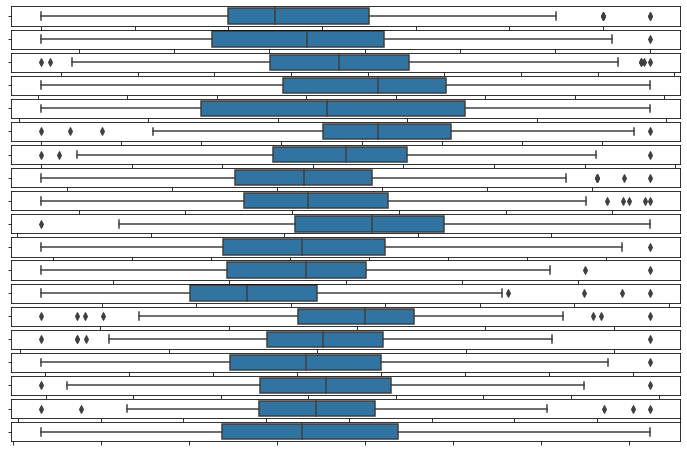

In [10]:
#cheking for outliers in a data using boxplots
columns_to_analyze = cbb19.columns[2:-2] #choose numeric columns
plt.figure(figsize= (12,8))
for i, col in enumerate(columns_to_analyze):
    plt.subplot(19,1,i+1)
    snsbp = sns.boxplot(x=cbb19[col])
    snsbp.set(xticklabels=[])
    snsbp.set(xlabel=None)



As the above figure shows, there seem to be some outliers in most of the columns. As such, we try to identify and replace outliers in the data.


In [11]:
# replacing outliers in each column with the mean value

for col in columns_to_analyze:
    q25,q50,q75 = np.percentile(cbb19[col], [25,50,75])
    iqr = q75 - q25  # inter-quartile range
    min = q25 - 1.5*iqr
    max = q75 + 1.5*iqr
    outlier_idx = cbb19[(cbb19[col]>max) | (cbb19[col]<min)].index #get outlier index
    cbb19.loc[outlier_idx,col] = np.nanmean(cbb19[col])

It's observed that the range of values varies for diffferent columns. Here, we define a new dataframe (i.e. cbb19_norm) by calculating the ratio between the values in mutually related columns.



In [12]:
cbb19_norm = pd.DataFrame()
cbb19_norm["TEAM"] = cbb19["TEAM"]
cbb19_norm["W_G_Ratio"] = cbb19["W"]/cbb19["G"]
cbb19_norm["ADJOE_ADJDE_Ratio"] = cbb19["ADJOE"]/cbb19["ADJDE"]
cbb19_norm["EFGO_EFGD_Ratio"] = cbb19["EFG_O"]/cbb19["EFG_D"]
cbb19_norm["TORD_TOR_Ratio"] = cbb19["TORD"]/cbb19["TOR"]
cbb19_norm["ORB_DRB_Ratio"] = cbb19["ORB"]/cbb19["DRB"]
cbb19_norm["FTR_FTRD_Ratio"] = cbb19["FTR"]/cbb19["FTRD"]
cbb19_norm["2PO_2PD_Ratio"] = cbb19["2P_O"]/cbb19["2P_D"]
cbb19_norm["3PO_3PD_Ratio"] = cbb19["3P_O"]/cbb19["3P_D"]
cbb19_norm["ADJT_Ratio"] = cbb19["ADJ_T"]/100
cbb19_norm["POSTSEASON"] = cbb19["POSTSEASON"]



In [13]:
# number of teams participating in the March Madness: 68
cbb19_norm['POSTSEASON'].notna().sum()


68

In [14]:
# Final standing of the teams in March Madness tournament
cbb19_norm['POSTSEASON'].value_counts(ascending=True)

Champions     1
2ND           1
F4            2
E8            4
R68           4
S16           8
R32          16
R64          32
Name: POSTSEASON, dtype: int64

In [15]:
# We can convert this categorical data to integers using the following mapping:
POSTSEASON_dict = {'Champions':1, '2ND':2, 'F4':3, 'E8':4, 'S16':5, 'R32':6, 'R64':7, 'R68':8}
cbb19_norm['POSTSEASON_Numeric'] = cbb19_norm['POSTSEASON'].map(POSTSEASON_dict)
cbb19_norm.drop(['POSTSEASON'],axis=1,inplace=True)
cbb19_norm['POSTSEASON_Numeric'].fillna(9,inplace=True)

cbb19_norm.head()

,TEAM,W_G_Ratio,ADJOE_ADJDE_Ratio,EFGO_EFGD_Ratio,TORD_TOR_Ratio,ORB_DRB_Ratio,FTR_FTRD_Ratio,2PO_2PD_Ratio,3PO_3PD_Ratio,ADJT_Ratio,POSTSEASON_Numeric
0,Gonzaga,0.891892,1.149455,1.144816,1.275168,1.175373,1.362934,1.153458,1.194079,0.720000,4.0
1,Virginia,0.539086,1.149455,1.234899,1.190476,1.196850,1.106464,1.148796,1.366782,0.691686,1.0
2,Duke,1.008031,1.332960,1.191111,1.108571,1.206780,1.383333,1.288889,1.030100,0.736000,4.0
3,North Carolina,0.805556,1.314004,1.081800,1.063953,1.548246,1.063380,1.087683,1.080597,0.760000,5.0
4,Michigan,0.810811,1.338785,1.170068,1.294964,0.995968,1.141079,1.169300,1.175258,0.659000,5.0


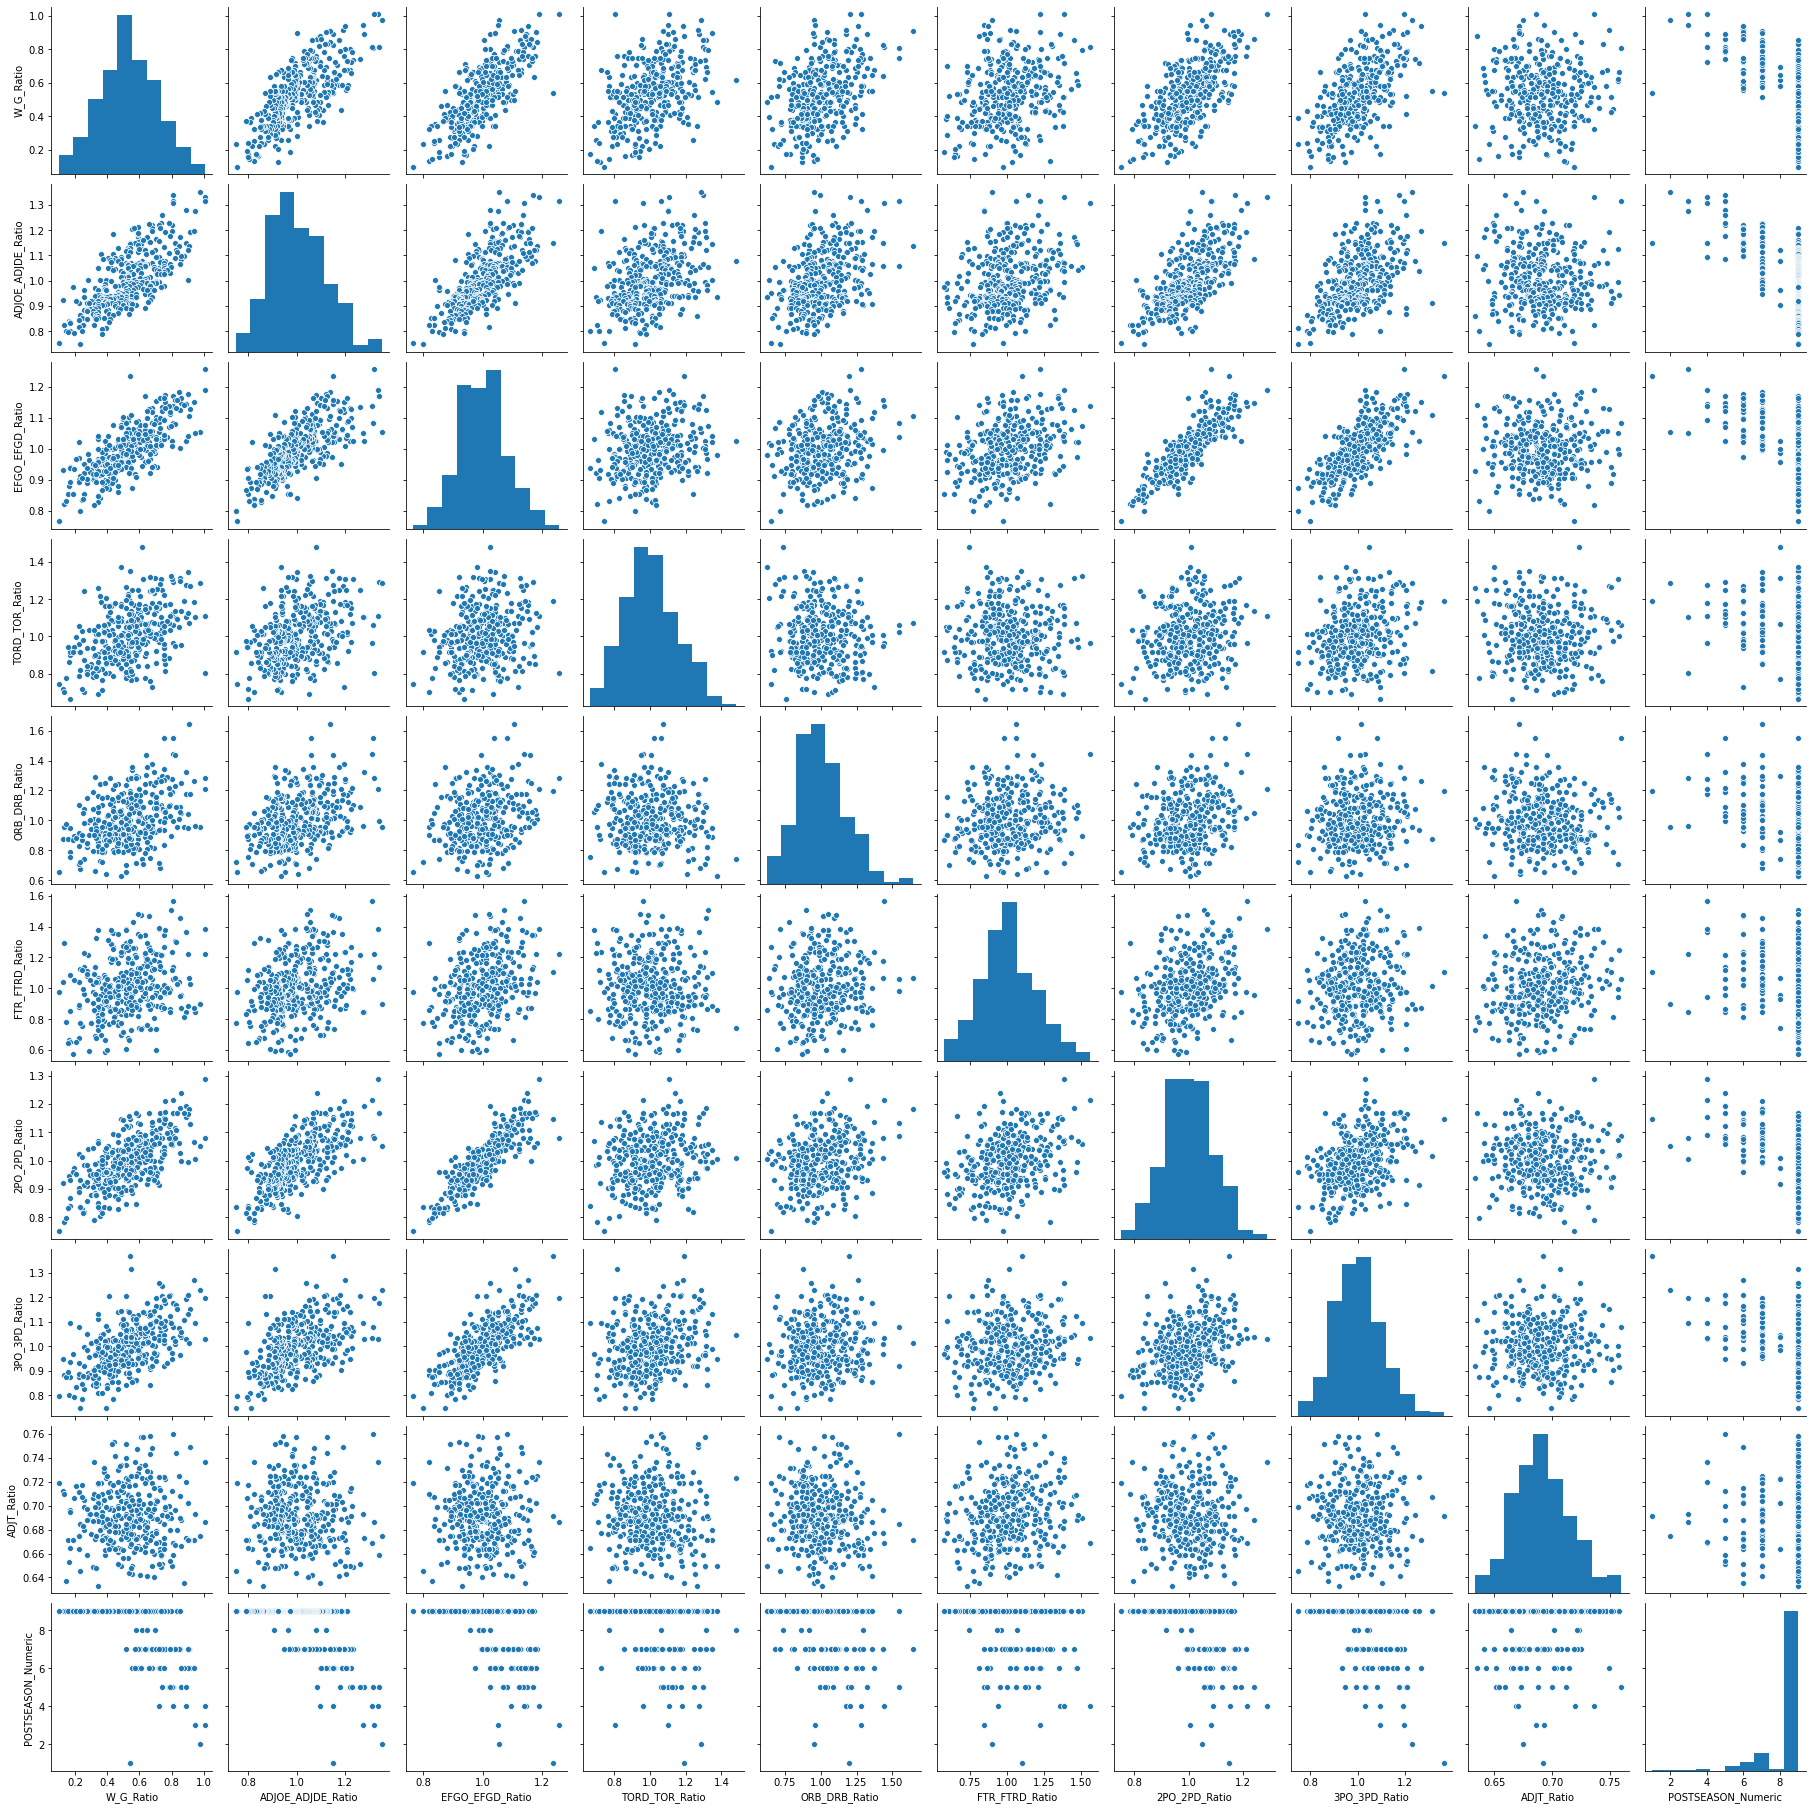

In [16]:
#To visualzie the resulting dataframe, we use seaborn's pairplot:
sns.pairplot(cbb19_norm)


According to the above pairplot, it seems that teams with higher W_G_Ratio generally have better (i.e. lower) POSTSEASON Rank.
According to these correaltions, we might be able to create linear regression models to "predict" the POSTSEASON Rank of the teams (target) based on the rest of the columns (features). These correlations can be better observed in the figure below. 


<AxesSubplot:>

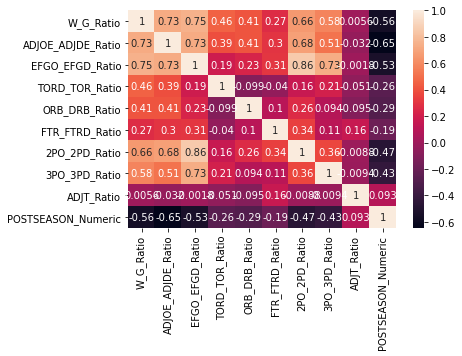

In [25]:
sns.heatmap(cbb19_norm.corr(), annot = True)

### 4.	Training at least 3 linear regression models:



In [60]:
# import necessary packages for linear regression models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict, train_test_split
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

#features and target
data = cbb19_norm.copy()
X = data.iloc[:,1:-1]
y = data["POSTSEASON_Numeric"]

In [61]:
### 4.1. Simple linear Regression

data = cbb19_norm.copy()

X = data.iloc[:,1:-1]
y = data["POSTSEASON_Numeric"]

kf = KFold(shuffle=True, random_state=1000, n_splits=3)
lr = LinearRegression()
ss = StandardScaler()

estimator = Pipeline([("scaler", ss), ("regression", lr)])
predictions = cross_val_predict(estimator, X, y, cv=kf)
print("r2 score for simple linear regression: {:.4f}".format(r2_score(y, predictions)))


r2 score for simple linear regression: 0.3552


In [62]:
### 4.2. Linear Regression with polynomial effects 

pf = PolynomialFeatures(degree=2)
estimator = Pipeline([("make_higher_degree", pf), ("scaler", ss), ("regression", lr)])
predictions = cross_val_predict(estimator, X, y, cv=kf)
print("r2 score for simple linear regression with polynomial features (deg=2): {:.4f}".format(r2_score(y, predictions)))
print("r2 score < 0 indicates that this model is worse than a constant model (i.e. y = constant)")

r2 score for simple linear regression with polynomial features (deg=2): -1.0868
r2 score < 0 indicates that this model is worse than a constant model (i.e. y = constant)


r2 score for Ridge (alpha=0.0062) regression with polynomial features (deg=2): 0.6210 


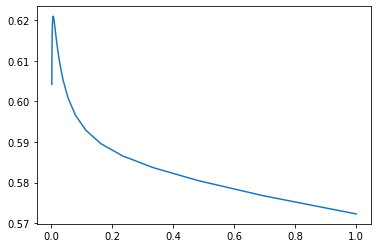

In [63]:
### 4.3. Linear Regression regularization (Ridge)

pf = PolynomialFeatures(degree=2)
alphas = np.geomspace(.001, 1, 20)
scores=[]
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000)

    estimator = Pipeline([
        ("polynomial_features", pf),
        ("scaler", ss),
        ("ridge_regression", ridge)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    score = r2_score(y, predictions)
    scores.append(score)

plt.plot(alphas, scores)

r2_max = np.max(scores)
alpha_max = alphas[scores.index(r2_max)]
print("r2 score for Ridge (alpha={:.4f}) regression with polynomial features (deg=2): {:.4f} ".format(alpha_max,r2_max))


(0.0, 10.0)

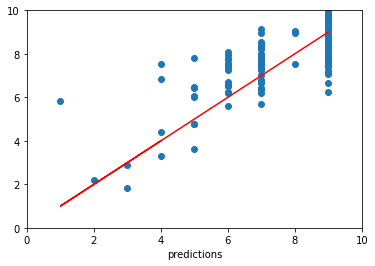

In [64]:
### 4.3. Linear Regression regularization (Ridge) - predictions scatter plot 

ridge = Ridge(alpha=alpha_max, max_iter=100000)

estimator = Pipeline([
    ("polynomial_features", pf),
    ("scaler", ss),
    ("ridge_regression", ridge)])

predictions = cross_val_predict(estimator, X, y, cv = kf)
plt.scatter(y, predictions)
plt.plot(y,y,'r')
plt.xlabel("y")
plt.xlabel("predictions")
plt.xlim([0,10])
plt.ylim([0,10])



### 5.	Final model recommendation
Comparing the r2 scores, the third model (i.e. Ridge regression with polynomial features and standard scaler) is recommended as the final model for prediction of POSTSEASON Ranks, as it has the highest r2 score.


### 6.	Summary Key Findings and Insights
- This project is focused on the "prediction" of post season ranks (target) for teams based on their season's performance and statistics (features).
- Data needs some cleanisng/pre-processing for the regression models.
- Correlations between the feature and target columns indicates the possibility of a linear regression model.
- 3 regression models have been tested:
    1. Simple linear Regression
    2. Linear Regression with polynomial effects 
    3. Linear Regression regularization (Ridge)
- Linear Regression regularization (Ridge) has the highest r2 score (i.e. accuracy) for prediction of the target



### 7.	Suggestions for next steps in analyzing this data:

Although there seem to be a number of outliers, the Data quality was generally good. That being said, one piece of info that could be helpful for analyzing this dataset, is a dataset that includes the result of all the played matches between these teams. That info could help us better undersand how the stats of each team is related to their strenght vs. the strength of their opponents.